<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [76]:
import matplotlib.pyplot as plt

% matplotlib inline

In [77]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [78]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn import metrics

In [79]:
boston_path = Path('..', 'unit3_project-master', 'data', 'boston_data.csv')
boston = pd.read_csv(boston_path)

In [80]:
boston.shape #shape of data

(506, 15)

In [81]:
boston.dtypes # data types

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

In [82]:
boston.isnull().sum()    #sum of null values

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

In [83]:
boston.describe() #summary statistics

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [84]:
#count number of unique values
boston.nunique()

Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
B             357
LSTAT         455
MEDV          229
dtype: int64

## Distribution of each column

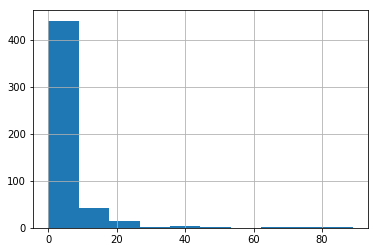

In [85]:
boston.loc[:,'CRIM'].hist();

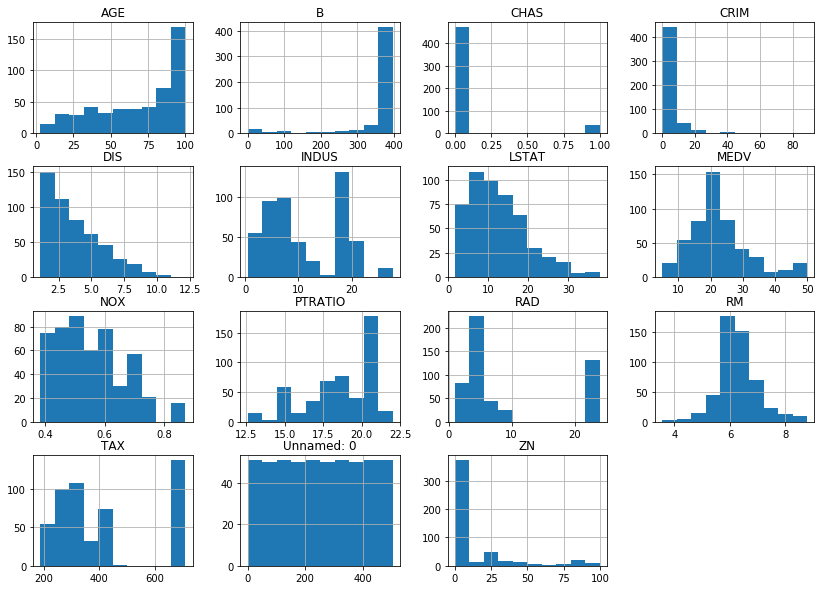

In [86]:
axes = boston.hist(figsize= (14,10)) # plot distribution of each column

# Scatter of each column with price

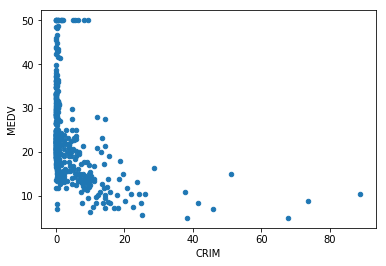

In [87]:
ax = boston.plot(kind='scatter', x = 'CRIM', y = 'MEDV')

In [88]:
boston.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

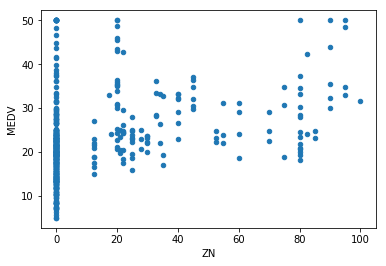

In [89]:
ax = boston.plot(kind='scatter', x = 'ZN', y = 'MEDV')

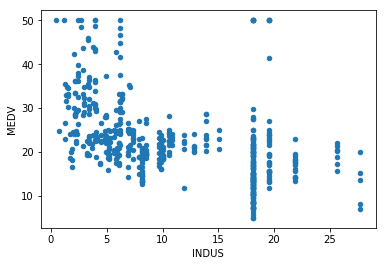

In [90]:
ax = boston.plot(kind='scatter', x = 'INDUS', y = 'MEDV')

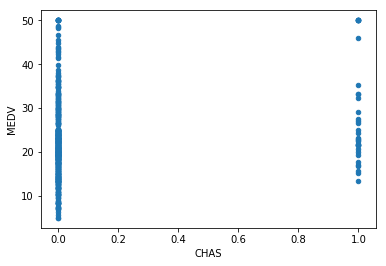

In [91]:
ax = boston.plot(kind='scatter', x = 'CHAS', y = 'MEDV')

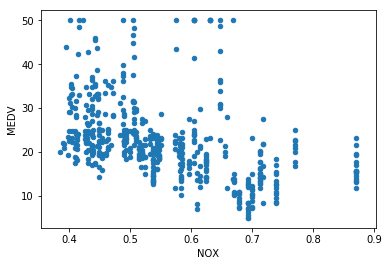

In [92]:
ax = boston.plot(kind='scatter', x = 'NOX', y = 'MEDV')

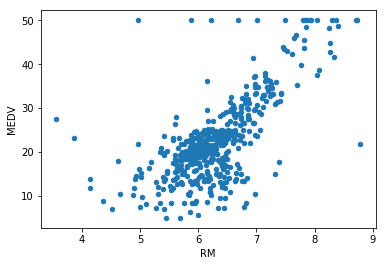

In [93]:
ax = boston.plot(kind='scatter', x = 'RM', y = 'MEDV')

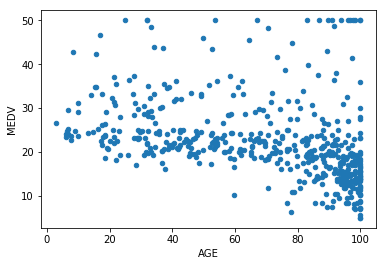

In [94]:
ax = boston.plot(kind='scatter', x = 'AGE', y = 'MEDV')

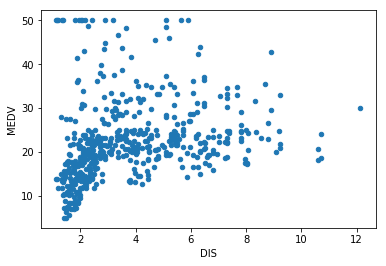

In [95]:
ax = boston.plot(kind='scatter', x = 'DIS', y = 'MEDV')

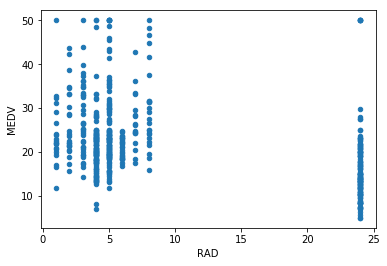

In [96]:
ax = boston.plot(kind='scatter', x = 'RAD', y = 'MEDV')

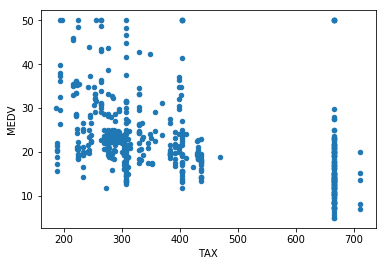

In [97]:
ax = boston.plot(kind='scatter', x = 'TAX', y = 'MEDV')

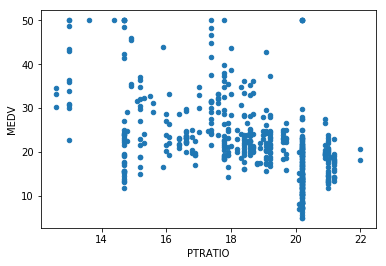

In [98]:
ax = boston.plot(kind='scatter', x = 'PTRATIO', y = 'MEDV')

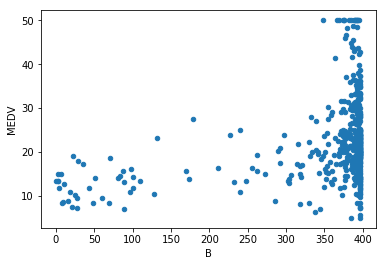

In [99]:
ax = boston.plot(kind='scatter', x = 'B', y = 'MEDV')

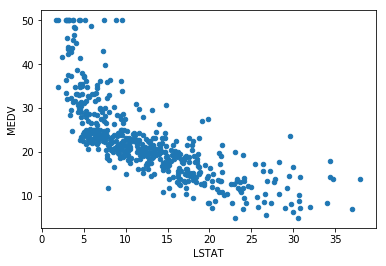

In [100]:
ax = boston.plot(kind='scatter', x = 'LSTAT', y = 'MEDV')

## Create model with all columns to compare coefficients

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lr_all = LinearRegression()

In [103]:
X = boston.loc[:,['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = boston.loc[:, 'MEDV']
lr_all.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
print(lr_all.intercept_)
print(lr_all.coef_)

36.49110328036143
[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [105]:
list(zip(X.columns, lr_all.coef_))

[('CRIM', -0.10717055656035511),
 ('ZN', 0.04639521952979883),
 ('INDUS', 0.020860239532176833),
 ('CHAS', 2.688561399317925),
 ('NOX', -17.795758660309108),
 ('RM', 3.8047524602580016),
 ('AGE', 0.0007510617033214805),
 ('DIS', -1.4757587965198196),
 ('RAD', 0.3056550383391007),
 ('TAX', -0.012329346305270331),
 ('PTRATIO', -0.9534635546905595),
 ('B', 0.009392512722188951),
 ('LSTAT', -0.5254666329007874)]

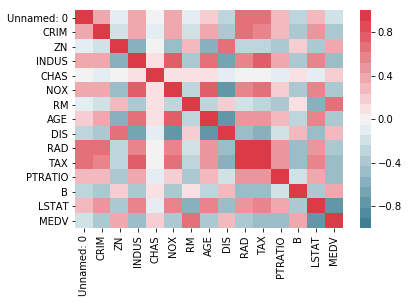

In [106]:
sns.heatmap(boston.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            );

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [107]:
null_pred = np.zeros(y.shape)
null_pred += np.mean(y)

In [108]:
# then compare predicting the mean every time to the true values
null_mse =(metrics.mean_squared_error(null_pred, y))
null_mse

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [109]:
# define fucntion tht accepts list of features and returns testing MSE
from sklearn.model_selection import train_test_split

def train_test_mse(boston, feature_cols):
    X = boston.loc[:, feature_cols]
    y = boston.loc[:, 'MEDV']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    
    lr1 = LinearRegression()
    lr1.fit(X, y)
    
    y_pred = lr1.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    return mse

In [110]:

#MSE for test data
print(train_test_mse(boston, ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']))
print(train_test_mse(boston, ['CRIM','ZN','INDUS','RM','TAX','PTRATIO','B','LSTAT']))
print(train_test_mse(boston, ['INDUS','RM','LSTAT']))
print(train_test_mse(boston, ['CRIM','ZN','INDUS','NOX','RM','AGE','RAD','TAX','PTRATIO','B','LSTAT']))


24.182528083903765
32.59188266526802
37.57891006551065
29.738645285069353


In [111]:
feature_cols =['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'] 

X = boston.loc[:, feature_cols]
y = boston.loc[:, 'MEDV']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    
lr1 = LinearRegression()
lr1.fit(X, y)
    
y_pred1 = lr1.predict(X_test)
lr1_mse = metrics.mean_squared_error(y_test, y_pred1)

lr2 = LinearRegression()
lr2.fit(X, y)
    
y_pred2 = lr2.predict(X_train)
lr2_mse = metrics.mean_squared_error(y_train, y_pred2)

print(lr1_mse)
print(lr2_mse)


24.182528083903765
20.916757105639835


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- My model had a much lower MSE on both the training and testing data. This would indicate that it has lower bias more variance.

- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [112]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)

In [113]:
feature_cols = ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']

X = boston.loc[:, feature_cols]

y = boston.loc[:, 'MEDV']

In [114]:
kf.split(X, y) #split the data into training and test sets

<generator object _BaseKFold.split at 0x1a1e56df48>

In [115]:
train_mse_values = []
test_mse_values= []

for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression()
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    train_mse = metrics.mean_squared_error(y_train, y_pred_train)
    test_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    
    
print('Average train MSE', sum(train_mse_values)/10)
print('Average test MSE', sum(test_mse_values)/10)

Average train MSE 22.929327067852398
Average test MSE 25.281803415116897


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed substantially better than the null model. This means that it has higher variance than the null and lower bias. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The test set appears to outperform the training set. There is a gap between the two so this could indicate that there is a variance problem.

- How much of a bias problem does your model appear to have? Why do you say that?

Given that the testing data did not perform as well it appears that the model has a bit of a bias problem.

- How much of a variance problem does your model appear to have? Why do you say that?

There does not appear to be much of a variance problem since the test data did better than the training data.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [116]:
kf2 = model_selection.KFold(n_splits=10, shuffle=True)

In [117]:
feature_cols = ['CRIM','ZN','DIS','AGE','RM','PTRATIO','B','LSTAT']

X = boston.loc[:, feature_cols]

y = boston.loc[:, 'MEDV']

In [118]:
kf2.split(X, y) #split the data into training and test sets

<generator object _BaseKFold.split at 0x1a1cb1a1b0>

In [119]:
train_mse_values = []
test_mse_values= []

for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression()
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    train_mse = metrics.mean_squared_error(y_train, y_pred_train)
    train_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    
    
print('Average train MSE', sum(train_mse_values)/10)
print('Average test MSE', sum(test_mse_values)/10)

Average train MSE 25.957561695428957
Average test MSE 36.18003541453821


Since the model initially included all available columns, it is not possible to add more. By removing features of various combinations, I was unable to improve the testing MSE significantly.


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.


# KNN Practice

In [120]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [121]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [122]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [123]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0,
                           'Iris-versicolor':1,
                           'Iris-virginica':2})

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [124]:
iris.shape

(150, 6)

In [125]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [126]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [127]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [128]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_num
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,0
Iris-versicolor,5.936,2.770,4.260,1.326,1
Iris-virginica,6.588,2.974,5.552,2.026,2


In [129]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

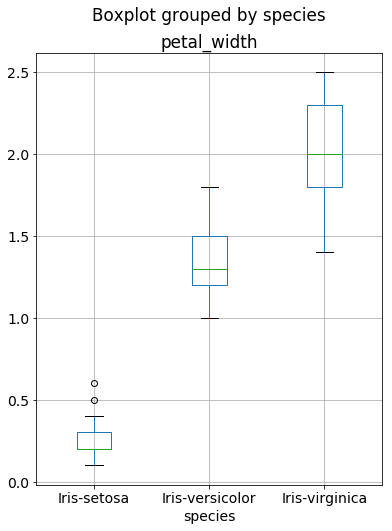

In [130]:
iris.boxplot(column='petal_width', by = 'species', figsize = (6,8));

In [131]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


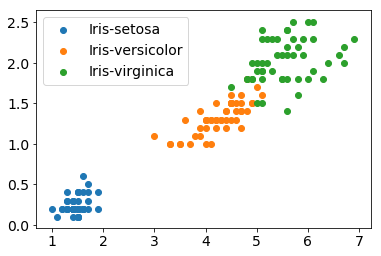

In [132]:
fig, ax = plt.subplots()
for species in iris.loc[:, 'species'].unique():
    ax.scatter(data=iris.loc[iris.loc[:, 'species'] == species, :], x='petal_length', y='petal_width', label=species)
    ax.legend();

In [133]:
iris.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width,species_num
species,,,,,
Iris-setosa,250.3,170.9,73.2,12.2,0
Iris-versicolor,296.8,138.5,213.0,66.3,50
Iris-virginica,329.4,148.7,277.6,101.3,100


- Get the accuracy of a null model that simply predicts the most common species.

In [136]:
y = iris.loc[:,'species_num']
most_common_value = y.value_counts().idxmax()
null_pred = np.zeros(y.shape) + most_common_value
null_pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [137]:
null_accuracy = metrics.accuracy_score(null_pred, y)
null_accuracy

0.3333333333333333

In [72]:
null_pred = np.zeros(y.shape)
null_pred += np.mean(y)

In [138]:
null_mse =(metrics.mean_squared_error(null_pred, y))
null_mse

1.6666666666666667

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [139]:
feature_cols = ['sepal_length','sepal_width', 'petal_length','petal_width']
X = iris.loc[:, feature_cols]
y = iris.loc[:,'species_num']

In [140]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_num'],
      dtype='object')

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

In [143]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [144]:
y_pred_class = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.9210526315789473

In [154]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.9333333333333333

In [155]:
from sklearn.model_selection import KFold

kf2 = KFold(n_splits=10, shuffle=True)

In [156]:
list(kf2.split(X,y))

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  13,  14,
          15,  16,  17,  18,  19,  21,  22,  25,  26,  27,  28,  29,  30,
          31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
          44,  45,  46,  47,  48,  49,  51,  52,  53,  54,  55,  56,  58,
          59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  70,  71,  72,
          73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
          86,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
         100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
         114, 115, 117, 118, 119, 120, 121, 122, 123, 125, 127, 129, 130,
         131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144,
         145, 146, 147, 148, 149]),
  array([  9,  11,  20,  23,  24,  50,  57,  63,  87, 113, 116, 124, 126,
         128, 135])),
 (array([  1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  16,
          17,  18,  19,  20,  21,  23,  24,  25,  26, 

In [161]:
train_mse_values2 = []
test_mse_values2= []


for train_indices, test_indices in kf2.split(X, y):
    lr = LinearRegression()
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    train_mse = metrics.mean_squared_error(y_train, y_pred_train)
    test_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
    train_mse_values2.append(train_mse)
    test_mse_values2.append(test_mse)
    
print('Average train MSE', sum(train_mse_values2)/10)
print('Average test MSE', sum(test_mse_values2)/10)

Average train MSE 0.04619692238144217
Average test MSE 0.05003916417775524


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

the training set performed better than the null 0.046 vs. 0.33

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

the average performance on the 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Based on the closeness in performance between the training and test sets it would seem that the model is generalizing well and based on the relatively small MSE it seems that the model is complex enough to provide very accurate predictions.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [163]:
knn_100 = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

1.0

- Naturally with a perfect accuracy score I'm hoping I didn't code something incorrectly, but I'll run the kfold cross validation anyway as per the exercise instructions

In [165]:
from sklearn.model_selection import KFold

kf3 = KFold(n_splits=10, shuffle=True)

list(kf3.split(X,y))

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,
          41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,
          55,  56,  58,  60,  61,  62,  63,  64,  65,  67,  68,  69,  72,
          73,  74,  75,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,
          87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
         100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114,
         116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
         130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143,
         144, 145, 146, 148, 149]),
  array([  9,  37,  46,  57,  59,  66,  70,  71,  79, 107, 111, 115, 117,
         138, 147])),
 (array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  19,  20,  21,  23,  25, 

In [166]:
train_mse_values3 = []
test_mse_values3= []


for train_indices, test_indices in kf3.split(X, y):
    lr = LinearRegression()
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    train_mse = metrics.mean_squared_error(y_train, y_pred_train)
    test_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
    train_mse_values2.append(train_mse)
    test_mse_values2.append(test_mse)
    
print('Average train MSE', sum(train_mse_values3)/10)
print('Average test MSE', sum(test_mse_values3)/10)

Average train MSE 0.0
Average test MSE 0.0


- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [167]:
train_scores = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_train)
    score = float(sum(pred == y_train)) / len(y_train)
    train_scores.append([k, score])

In [168]:
scores_df = pd.DataFrame(train_scores, columns=['k', 'train_score'])

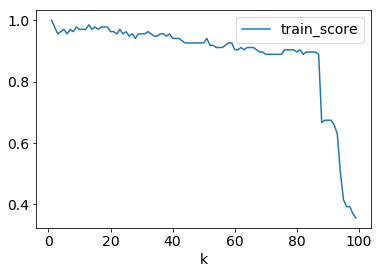

In [169]:
ax = scores_df.plot(x='k', y='train_score')

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))